In [1]:
import sys
sys.path.insert(0,'/Users/august/Coding/topic-modelling')

In [2]:
from topic_modelling.data_loader import DataLoader
from topic_modelling.LDA import LDA
import seaborn as sns
from sklearn.decomposition import PCA

data_path = "../data/abcnews_lem_stem.pickle"
dl = DataLoader()
n_rows = 100000
corpus = dl.load(data_path, n_rows=n_rows)
num_topics = 9
lda = LDA(corpus)

lda.fit(verbosity=False, num_topics=num_topics, iterations=50)

Read processed data from: ../data/abcnews_lem_stem.pickle


In [3]:
topics, _ = lda.get_topics()
for topic in topics:
    print(topic)

['plan', 'fund', 'new', 'boost', 'council', 'get', 'servic', 'centr', 'studi', 'hospit', 'work', 'rail', 'call', 'concern', 'urg', 'research', 'school', 'help', 'industri', 'communiti']
['win', 'cup', 'england', 'back', 'test', 'world', 'final', 'australia', 'injuri', 'play', 'clash', 'set', 'player', 'coach', 'india', 'face', 'black', 'new', 'blue', 'name']
['water', 'plan', 'council', 'fire', 'farmer', 'protest', 'polic', 'call', 'urg', 'restrict', 'consid', 'new', 'iraq', 'terror', 'hill', 'warn', 'blaze', 'anti', 'war', 'drought']
['court', 'say', 'iraq', 'appeal', 'ban', 'case', 'face', 'report', 'warn', 'rule', 'new', 'drug', 'trial', 'former', 'hear', 'chief', 'call', 'releas', 'inquiri', 'claim']
['iraq', 'strike', 'trade', 'deal', 'pay', 'protest', 'worker', 'plan', 'union', 'iraqi', 'troop', 'war', 'talk', 'say', 'israel', 'free', 'warn', 'job', 'palestinian', 'attack']
['polic', 'man', 'kill', 'charg', 'crash', 'court', 'murder', 'attack', 'miss', 'face', 'bomb', 'two', 'dea

In [4]:
topic_matrix = lda.topic_word_matrix

In [5]:
categories = ['topic ' + str(i+1) for i in range(num_topics)]

In [6]:
pca = PCA(n_components=9).fit(topic_matrix)
X_pca = pca.transform(topic_matrix)

In [7]:
def get_best_topic(array):
    return np.argmax(array)

In [8]:
import numpy as np
topic_assignments = np.apply_along_axis(get_best_topic, 0, topic_matrix)

In [9]:
sizes = np.unique(topic_assignments, return_counts=True)[1]

In [10]:
data = {
    "x1": X_pca[:,0],
    "x2": X_pca[:, 1],
    "weight": sizes
    }

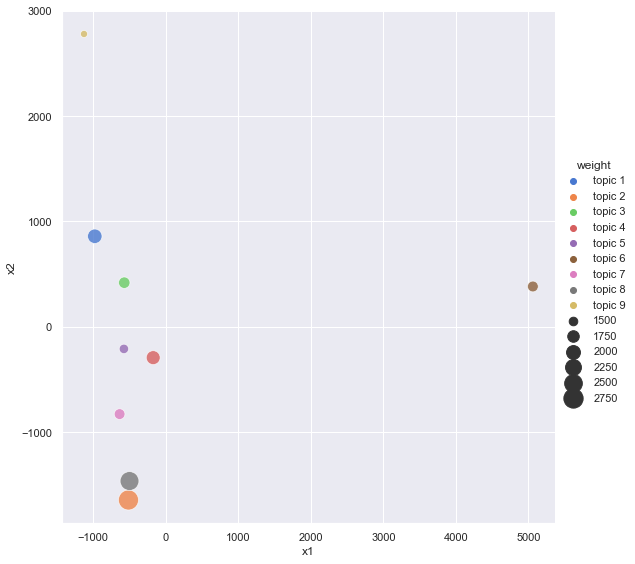

In [11]:
sns.set(rc={'figure.figsize':(20,20)})
relplot = sns.relplot(
    x="x1", y="x2", hue=categories, size="weight",
    sizes=(50, 400), alpha=0.8, palette="muted",
    data=data, legend="auto", height=8)
fig = relplot.fig
fig.savefig(f"../topic_modelling/images/LDA/PCA/PCA_{n_rows}x{num_topics}.png") 

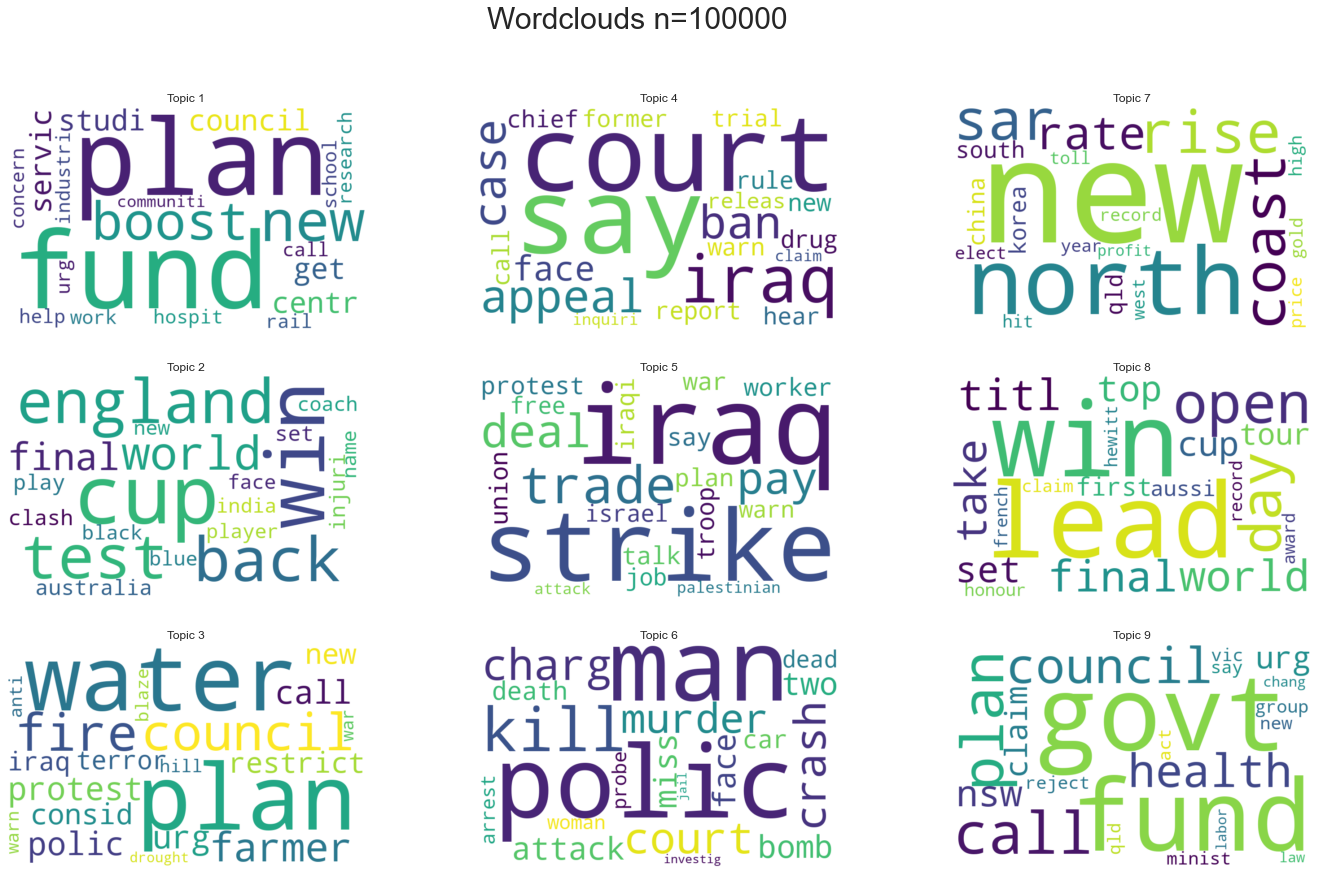

In [12]:
lda.plot_word_clouds_all(path="../topic_modelling/images/LDA/wordcloud")